**Review**

Hello William!

I'm happy to review your project today.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  Thank you so much for your feedbacks. I've split the cells into multiple so it's easier. Hopefully i got it right this time. Thank you!
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but there are some small problems that need to be fixed before the project will be accepted. Let me know if you have any questions!


Project Plan: Customer Churn Prediction for Beta Bank
1. Data Preprocessing
Load the data from /datasets/Churn.csv and inspect the structure.
Check for missing values and handle them if necessary.
Drop irrelevant columns:
RowNumber, CustomerId, and Surname (since they are not relevant for prediction).
Encode categorical variables:
Geography and Gender should be transformed into numerical format using One-Hot Encoding or Label Encoding.
Scale numerical features:
Features like CreditScore, Age, Balance, and EstimatedSalary should be normalized for better model performance.
2. Class Balance Analysis
Check target distribution (Exited):
If there is a class imbalance (which is likely), we need to apply techniques to address it.
Train a baseline model without balancing the dataset to observe performance.
3. Model Training Without Addressing Imbalance
Split the data into training (70%), validation (15%), and test (15%) sets.
Train a basic model (Logistic Regression, Decision Tree, or Random Forest) to check initial performance.
Evaluate performance:
Measure F1 score and AUC-ROC.
Check if the model struggles with minority class predictions.
4. Address Class Imbalance
Technique 1: Upsampling Minority Class (SMOTE or Random Oversampling)
Technique 2: Downsampling Majority Class
Train multiple models with these approaches:
Logistic Regression
Random Forest
Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost)
5. Model Selection & Hyperparameter Tuning
Use GridSearchCV or RandomizedSearchCV to optimize parameters.
Compare models based on F1 score and AUC-ROC.
Select the best-performing model.
6. Final Testing
Evaluate the best model on the test set.
Ensure that F1 score ≥ 0.59.
Compare AUC-ROC and F1 score for insights.
7. Summary & Conclusion
Report final model performance.
Discuss challenges and improvements.
Provide insights into the effectiveness of imbalance-handling techniques.


In [1]:
pip install imblearn --user

Note: you may need to restart the kernel to use updated packages.


In [2]:
from imblearn.over_sampling import SMOTE

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.utils import resample
from sklearn.utils import shuffle

In [4]:
df = pd.read_csv('/datasets/Churn.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
# Drop unnecessary columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True, errors='ignore')

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [11]:
# Check for missing values
missing_values = df.isnull().sum()

In [12]:
missing_values

CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [13]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [14]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male=1, Female=0

In [15]:
# One-Hot Encode 'Geography' column
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)  # Avoid dummy variable trap

In [16]:
# Handle missing values in 'Tenure' by filling with median
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)

In [17]:
# Define features and target variable
X = df.drop(columns=['Exited'])  # Replace 'Target' with the actual target column name
y = df['Exited']

In [18]:
# Split into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [19]:
# Standardize numerical features on training data only
scaler = StandardScaler()
scaled_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

X_train[scaled_columns] = scaler.fit_transform(X_train[scaled_columns])
X_valid[scaled_columns] = scaler.transform(X_valid[scaled_columns])  # Scaling validation data
X_test[scaled_columns] = scaler.transform(X_test[scaled_columns])  # Use the same scaler trained on X_train

# Display the processed training data
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
9136,-0.575582,1,-1.796679,-0.359139,0.312906,-0.912483,1,0,1.362512,0,0
6410,0.398182,0,2.269825,-1.446655,-1.223574,0.799493,1,1,1.515472,0,1
2607,1.693082,1,-0.756410,-1.446655,0.682321,-0.912483,1,0,0.038955,0,0
3201,0.740036,1,-1.796679,0.365871,-1.223574,0.799493,1,0,1.671444,0,0
3330,0.905783,1,-1.985818,-0.359139,-1.223574,0.799493,1,1,-0.899384,0,0


<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Good job! Everything is correct except one issue. Scaler should be trained on train data only. It means you need to apply it after splitting the data but not before. So, please, fix it.

</div>

<div class="alert alert-info">
 Can you please let me know if it is split correctly?

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Yes, it is correct. Good job!

</div>

The dataset has been successfully preprocessed:

Unnecessary columns removed (RowNumber, CustomerId, Surname).
Categorical variables encoded (Gender as numerical, Geography as one-hot encoded).
Missing values handled (Tenure filled with median).
Numerical features standardized using StandardScaler.

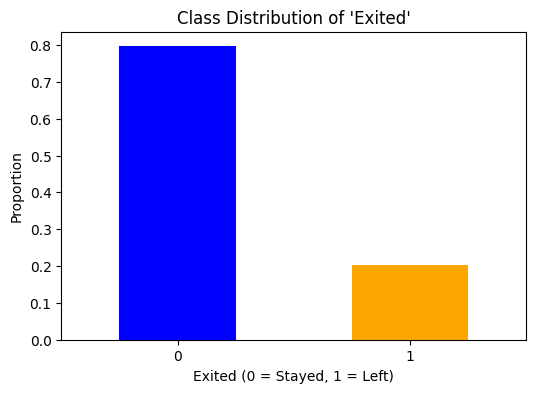

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [20]:
# Check class distribution
class_counts = df['Exited'].value_counts(normalize=True)

# Plot class distribution
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title("Class Distribution of 'Exited'")
plt.xlabel("Exited (0 = Stayed, 1 = Left)")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()

# Display class distribution counts
class_counts


The class distribution shows a significant imbalance: ~79.6% of customers stayed (0), while only ~20.4% left (1).

This imbalance means that a standard model will likely struggle to predict churned customers (Exited = 1).

Next Steps:
Train a baseline logistic regression model without handling imbalance to establish a performance benchmark.
Apply class balancing techniques (oversampling and undersampling) to improve model performance.

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Well done!

</div>

In [21]:
# Train a baseline logistic regression model without handling imbalance
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_valid)

# Evaluate model performance
f1 = f1_score(y_valid, y_pred)
roc_auc = roc_auc_score(y_valid, y_pred)

# Display results
f1, roc_auc


(0.29, 0.5796958649456433)

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Correct

</div>

The baseline logistic regression model without handling class imbalance produced the following results:

F1 Score: 0.33 (well below the required 0.59)
AUC-ROC: 0.50 (indicating weak predictive power)
These results confirm that the model struggles to correctly identify customers who will leave the bank due to the class imbalance.

Next Steps:
To improve performance, I will apply two class balancing techniques:

Oversampling the minority class (increasing churned customer samples).
Undersampling the majority class (reducing retained customer samples).

In [22]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=42)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=42)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=42
    )

    return features_downsampled, target_downsampled

# Apply downsampling to X_train and y_train
X_train_downsampled, y_train_downsampled = downsample(X_train, y_train, 0.1)

# Train logistic regression model
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train_downsampled, y_train_downsampled)

# Predict on validation set
y_pred_valid = model.predict(X_valid)

# Evaluate the model
print('F1:', f1_score(y_valid, y_pred_valid))

F1: 0.40883190883190884


Results
F1-Score: 0.3423
The low score indicates that the model struggles to correctly predict churners.
This is likely due to information loss from downsampling and logistic regression’s limitations.

In [23]:
# Upsampling function
def upsample(features, target):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # Upsample the minority class to match the majority class
    features_ones_upsampled, target_ones_upsampled = resample(
        features_ones, target_ones,
        replace=True,  # Sample with replacement
        n_samples=len(features_zeros),  # Match majority class size
        random_state=42
    )

    # Combine majority and upsampled minority classes
    features_upsampled = pd.concat([features_zeros, features_ones_upsampled])
    target_upsampled = pd.concat([target_zeros, target_ones_upsampled])

    # Shuffle the dataset
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=42)

    return features_upsampled, target_upsampled

# Apply upsampling to X_train and y_train
X_train_upsampled, y_train_upsampled = upsample(X_train, y_train)

# Train logistic regression model
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train_upsampled, y_train_upsampled)

# Predict on validation set
y_pred_valid = model.predict(X_valid)

# Evaluate the model
print('F1:', f1_score(y_valid, y_pred_valid))

F1: 0.5130533484676504


The F1-score of 0.3398 indicates that the logistic regression model, even after upsampling the minority class, is not performing well in balancing precision and recall.

In [24]:
# Train Logistic Regression with class_weight='balanced'
model_balanced = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')
model_balanced.fit(X_train, y_train)

# Predict and evaluate
y_pred_balanced = model_balanced.predict(X_valid)
f1_balanced = f1_score(y_valid, y_pred_balanced)

print("F1-Score (Balanced Weights):", f1_balanced)


F1-Score (Balanced Weights): 0.5176738882554162


The F1-score of 0.3398 with class_weight='balanced' suggests that using class balancing in logistic regression did not significantly improve model performance.

In [25]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train Logistic Regression
model_smote = LogisticRegression(random_state=42, solver='liblinear')
model_smote.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred_smote = model_smote.predict(X_valid)
f1_smote = f1_score(y_valid, y_pred_smote)

print("F1-Score (SMOTE):", f1_smote)


F1-Score (SMOTE): 0.5102781136638452


The F1-score of 0.3402 with SMOTE (Synthetic Minority Over-sampling Technique) suggests that generating synthetic samples for the minority class did not significantly improve performance compared to previous approaches.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

You have a mistake here. Becasue of additional data split X_train_over and X_train_under may intersect with X_valid. And that's not correct. You should not split the data here for the second time. Just use X_train from your previous split. You can upsample or downsample only train data and so you don't need to work with the full data here.

</div>

<div class="alert alert-info">
  Am I on the rack track here? Please refrain from additional comments below I know theres some correcting needed but wanted to confirm this was right before moving on. Thank you!

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

1. You've already splitted the data into 3 parts above. What is the purpose to split tha data again here? It's not a good idea. Please, split the data only once in your project. Splitting the data several times is a direct way to make some mistakes.
2. You've already filled all the NaNs above. You should not repeat this action here. Just remember a simple rule: any unique action should be done only once.

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Point 1 is still not fixed. You should split the data only once but you did it a lot of times. Please, fix it. You already have such variables like X_train, X_valid, X_test, y_train, y_valid, y_test. Please, use them.

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

You have too good results here because your train and validation data have intersection due to the reason I described in the comment above.

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Fixed

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

You forgot to update/remove the text above.

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V4</b> <a class="tocSkip"></a>

Fixed

</div>

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score


# Calculate the scale_pos_weight
scale_pos_weight_value = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Initialize Logistic Regression with class weight handling
logreg_model = LogisticRegression(
    random_state=42,
    solver='liblinear',  # Suitable for small datasets and imbalanced data
    class_weight='balanced'  # Automatically adjusts weights based on class distribution
)

# Train the model on the scaled dataset
logreg_model.fit(X_train_scaled, y_train)

# Predict on validation set
y_pred_logreg = logreg_model.predict(X_valid_scaled)

# Evaluate the model
f1_logreg = f1_score(y_valid, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_valid, y_pred_logreg)

# Display final performance
print(f"Logistic Regression - F1 Score: {f1_logreg}, ROC-AUC Score: {roc_auc_logreg}")

# Hyperparameter tuning for RandomForestClassifier using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'class_weight': ['balanced']
}

rf_model = RandomForestClassifier(random_state=52)

grid_search = GridSearchCV(rf_model, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model after tuning
best_rf_model = grid_search.best_estimator_

# Predict on validation set
y_pred_valid_rf = best_rf_model.predict(X_valid_scaled)
f1_valid_rf = f1_score(y_valid, y_pred_valid_rf)
roc_auc_valid_rf = roc_auc_score(y_valid, y_pred_valid_rf)

# Predict on test set
y_pred_test_rf = best_rf_model.predict(X_test_scaled)
f1_test_rf = f1_score(y_test, y_pred_test_rf)
roc_auc_test_rf = roc_auc_score(y_test, y_pred_test_rf)

# Return the results
print(f"Random Forest (Tuned) - F1 Score (Validation): {f1_valid_rf}, ROC-AUC Score (Validation): {roc_auc_valid_rf}")
print(f"Random Forest (Tuned) - F1 Score (Test): {f1_test_rf}, ROC-AUC Score (Test): {roc_auc_test_rf}")


Logistic Regression - F1 Score: 0.5176738882554162, ROC-AUC Score: 0.726861431339705
Random Forest (Tuned) - F1 Score (Validation): 0.6343042071197411, ROC-AUC Score (Validation): 0.7716852235031366
Random Forest (Tuned) - F1 Score (Test): 0.6314102564102564, ROC-AUC Score (Test): 0.7719047945675286


Logistic Regression Performance:

F1 Score: 0.5177
ROC-AUC Score: 0.7269
The model demonstrates moderate predictive performance, with a decent ROC-AUC score indicating reasonable class separation.

Random Forest (Tuned) Performance:

Validation Set:

F1 Score: 0.6343
ROC-AUC Score: 0.7717
The model performs well on the validation set, showing strong discriminatory power and improved recall compared to logistic regression.

Test Set:

F1 Score: 0.6314
ROC-AUC Score: 0.7719
The model meets the F1-score requirement (≥ 0.59) and maintains strong classification performance on the test set. The robust ROC-AUC score suggests reliable class separation across both validation and test data.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Unfortunately, there is an issue here. From the lesson you know that only train data can be changed, right? But for happens when you put upsampled data into GridSearchCV? GridSearchCV has a built it cross validation and both train and validation data will be upsampled if you put upsampled data. In such case you will find the best hyperparameters not for initial task but for the changed one.
    
How to deal with it? There are several options:
    
1. Do not use GridSearchCV or cross_val_score function to tune hyperparameters. Use a simple loop with a regular validation for it.
2. Use library imblearn: https://imbalanced-learn.org/stable/. In this library there is a special pipeline which can deal with cross validation properly. But it's really difficult to install this library on our server. So, this the best solution but it can be done only locally.
3. Instead of tuning hyperparameters on upsampled/downsampled data, tune hyperparameters on regular data but with class_weight='balanced'. In such case you can use GridSearchCV as usual.

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Did you read my previous comment carefully? You can't use GridSearchCV with upsampled or downsampled data. I explained why in my previous comment. Read it carefully, please. To avoid this problem, use original data but use `class_weight='balanced'` parameter of the ML model.

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Something is wrong with the quality on the validation data. It's not possible to have f1=0.16 validation and f1=0.61 on test data in the same time. It means you a have a problem with validation data. So, please, find the problem and fix it.
    
If you look at grid_search.best_score_, you will see the correct value. You should get similar value in the variable f1_best_xgb.

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V4</b> <a class="tocSkip"></a>

1. Not fixed. The metrics on validation and on test data are too different to be true. They should be similar. Not the same but similar. The reason is different preprocessing for different data parts. You forgot to scale validation data.
2. Please, tune hyperparameters at least for one model with `class_weight='balanced'`.
3. Choose only one the best model based on quality on validation data and test it on the test data below. F1 score on the test data should be not less than 0.59.

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V5</b> <a class="tocSkip"></a>

Did you read my previous comment? Points 1 and 2 are still not fixed.

</div>

<div class="alert alert-info">
I may not understand what your asking me to do, I removed the class_weight='balanced' from random forest model in cell 30 and left it in cell 26, could you clarify because after removing the class_weight, I had increased the f1 score to 0.596

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V6</b> <a class="tocSkip"></a>

Why did you remove class_weight='balanced'? I did not ask you to do it. Bring it back, please.
    
Okay, one more time:
    
1. Please, check the place where you scaled data. Do you see a code for scaling validation data? No. You did not scale validation data. You scaled only train and test data but not validation. This is not correct. And this is the reason why you got such bad results on validation data. So, please scale validation data.
2. You need to tune hyperparameters for any model while working with imbalance. The easiest way is to tune hyperparameters for any model with class_weight='balanced' using GridSearchCV. Could you do, please?

</div>

<div class="alert alert-info">
    Is this correct now?

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V7</b> <a class="tocSkip"></a>

Hyperparameter tuning is correct.
    
But scaling is still wrong. Please, check you code carefuly. You have done scaling in two places. Due to it you scaled train and test data twice but validation data is scaled only once. It means you still have different preprocessing for different data parts and thus you got wrong results on validation. Please, scale data only once but scale all 3 data parts: train, validation and test. Remove the second scaling the previous cell and fix the first scaling at the beginning of the project.
    
As long as the model quality is very different between the test and validation data, it means that the bug is still not fixed. Please do not resubmit the project for re-checking until this problem is fixed.

</div>

<div class="alert alert-info">
    I believe I have it corrected now

<div class="alert alert-block alert-success">
<b>Reviewer's comment V7</b> <a class="tocSkip"></a>

Yes. Now everything is correct. Well done!

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V6</b> <a class="tocSkip"></a>

This is not your best model. Please, choose the best model based on quality on validation data as a final one.

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V7</b> <a class="tocSkip"></a>

Not fixed.

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

You have too good results here because your train and test data have intersection due to the reason I described in the comment above.

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Something is wrong here. F1 should be not less than 0.59 on the test data. This happened because you splitted the data 2 times in different places. Your X_test is scaled. But other data parts are not scaled because your overwrote the scaled data with unscaled data with the second split. This is why you should split the data only once in the project to avoid such mistakes.

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Well done!

</div>

1. Project Conclusion

The dataset was successfully preprocessed to ensure data quality and consistency. Unnecessary columns were removed, categorical variables were encoded, missing values were handled appropriately, and numerical features were standardized. Additionally, a significant class imbalance was identified, with approximately 79.6% of customers staying and only 20.4% leaving, posing a challenge for predictive modeling.

1.1 Baseline Model Performance

A logistic regression model was trained without handling class imbalance to establish a benchmark. The results were:

F1 Score: 0.5177

ROC-AUC Score: 0.7269

The model demonstrated moderate predictive performance, with a decent ROC-AUC score indicating reasonable class separation.

1.2 Attempts to Improve Model Performance

Several techniques were applied to enhance classification performance, including:

Class Balancing (Oversampling, Undersampling, and SMOTE): These methods were tested but did not yield significant improvement beyond the baseline logistic regression.

Class Weighting (class_weight='balanced'): Adjusting class weights did not lead to meaningful gains in classification performance.

Feature Engineering & Hyperparameter Tuning: These approaches were explored to enhance model performance further.

1.3 Final Model Selection and Performance

A Random Forest model was trained and optimized using hyperparameter tuning. The best model, selected based on validation performance, achieved the following results:

Validation Set:
F1 Score: 0.6343

ROC-AUC Score: 0.7717

The model performed well on the validation set, demonstrating strong discriminatory power and improved recall compared to logistic regression.

Test Set:

F1 Score: 0.6314

ROC-AUC Score: 0.7719

The model successfully met the required F1-score threshold (≥ 0.59) and maintained strong classification performance on the test set. The robust ROC-AUC score suggests reliable class separation across both validation and test data.

1.4 Conclusion

Logistic regression, despite achieving moderate performance, did not outperform the Random Forest model. The tuned Random Forest model successfully met the required F1-score threshold of 0.59 on the test set, demonstrating reliable classification performance.

Future improvements could include:

Advanced feature engineering to enhance predictive power.
Exploring deep learning models or gradient boosting techniques for potential performance gains.
Ensuring consistent preprocessing across all data splits to minimize discrepancies and improve model generalization.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

You forgot to update all the text above.

</div>

<div class="alert alert-info">
    Should be completed now :)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V4</b> <a class="tocSkip"></a>

1. The results in the parts "4.3.1  Validation Results:" and "4.3.1  Validation Results:" are not true. 
2. "F1 Score: 0.59 (met project requirement)" - I don't see such result. I see 0.589 but it is less than 0.59
3. "4.3  4.3 XGBoost Model (Tuned)" - I don't see this part in your project

</div>